In [129]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns
from colorama import Fore, Back, Style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

## Here are the different variables used in this term project
 * Schizophrenia disorder 
 * Depressive disorder
 * Anxiety disorder
 * Bipolar disorder
 * Eating disorder
 * Major depression
 * Eating Disorder
 * Nearly Every Day
 * More than half of the day
 * several days

In [132]:
# Read data

Data1 = pd.read_csv("Datasets/1- mental-illnesses-prevalence.csv")
Data2 = pd.read_csv("Datasets/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
Data3 = pd.read_csv("Datasets/6- depressive-symptoms-across-us-population.csv")
Data4 = pd.read_csv("Datasets/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

In [134]:
# Get data into dataframes for further analysis

df1 = pd.DataFrame(Data1)
df2 = pd.DataFrame(Data2)
df3 = pd.DataFrame(Data3)
df4 = pd.DataFrame(Data4)

## Showing the descriptive characteristics details inside the dataframe for variables 
* Mean
* Min
* Max 

In [137]:
df1.drop(columns=['Year']).describe().loc[['mean','min','max']].T


,mean,min,max
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,0.266604,0.188416,0.462045
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,3.767036,1.522333,7.645899
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,4.101840,1.879996,8.624634
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,0.636968,0.181667,1.506730
Eating disorders (share of population) - Sex: Both - Age: Age-standardized,0.195664,0.044780,1.031688


## Mode from dataframe 

In [140]:
df1.mode('index',True,True)

,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,1990,0.211642,2.964739,3.531769,0.54848,0.065898
1,1991,0.215830,4.328565,4.091090,NaN,0.177606
2,1992,0.271035,4.440195,4.105643,NaN,0.417540
3,1993,0.273570,5.957178,NaN,NaN,NaN
4,1994,0.273879,NaN,NaN,NaN,NaN
5,1995,0.275704,NaN,NaN,NaN,NaN
6,1996,0.283287,NaN,NaN,NaN,NaN
7,1997,0.283584,NaN,NaN,NaN,NaN
8,1998,0.284089,NaN,NaN,NaN,NaN
9,1999,0.284910,NaN,NaN,NaN,NaN


## Following is a function made for this project calling
* variables 
* data types 
* Missing and Uniques values

In [143]:
def describe(df):
        
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
      
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        
    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output

## I like the different colors and learnt that from my past python courses since using it here 

In [146]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   RED = '\033[41m'
   GREEN = '\033[42m'
   ORANGE = '\033[43m'
   PURPLE = '\033[45m'
   CYAN = '\033[46m'
   LIGHTGREY = '\033[47m'

In [148]:
print(color.BOLD + color.PURPLE + color.UNDERLINE +
      '"The describe table of df1 : Mental illness dataframe"' + color.END)
print(describe(df1))

"The describe table of df1 : Mental illness dataframe"
                                            variable    dtype  count  unique  \
0                                             Entity   object   6420     214   
1                                               Code   object   6420     206   
2                                               Year    int64   6420      30   
3  Schizophrenia disorders (share of population) ...  float64   6420    6406   
4  Depressive disorders (share of population) - S...  float64   6420    6416   
5  Anxiety disorders (share of population) - Sex:...  float64   6420    6417   
6  Bipolar disorders (share of population) - Sex:...  float64   6420    6385   
7  Eating disorders (share of population) - Sex: ...  float64   6420    6417   

   missing value  
0              0  
1            270  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  


In [150]:
print(color.BOLD + color.ORANGE + color.UNDERLINE +
      '"The describe table of df2 : Adult population, mental illnesses"' + color.END)
print(describe(df2))


"The describe table of df2 : Adult population, mental illnesses"
            variable    dtype  count  unique  missing value
0             Entity   object     22      22              0
1               Code   object     22       2             21
2               Year    int64     22       1              0
3   Major depression  float64     22      18              0
4   Bipolar disorder  float64     22      14              0
5   Eating disorders  float64     22      11              0
6          Dysthymia  float64     22      14              0
7      Schizophrenia   object     22      14              0
8  Anxiety disorders  float64     22      18              0


In [152]:
print(color.BOLD + color.CYAN + color.UNDERLINE +
      '"The describe table of df3 : Depressive"' + color.END)
print(describe(df3))

"The describe table of df3 : Depressive"
                  variable    dtype  count  unique  missing value
0                   Entity   object     10      10              0
1                     Code  float64     10       1             10
2                     Year    int64     10       1              0
3         Nearly every day  float64     10       9              0
4  More than half the days  float64     10      10              0
5             Several days  float64     10      10              0
6               Not at all  float64     10      10              0


In [154]:
print(color.BOLD + color.LIGHTGREY + color.UNDERLINE +
      '"The describe table of df4 : Number of countries"' + color.END)
print(describe(df4))

"The describe table of df4 : Number of countries"
                                            variable    dtype  count  unique  \
0                                             Entity   object     15      15   
1                                               Code  float64     15       1   
2                                               Year    int64     15       1   
3  Number of countries with primary data on preva...    int64     15      11   

   missing value  
0              0  
1             15  
2              0  
3              0  


# Visualizations with Plotly

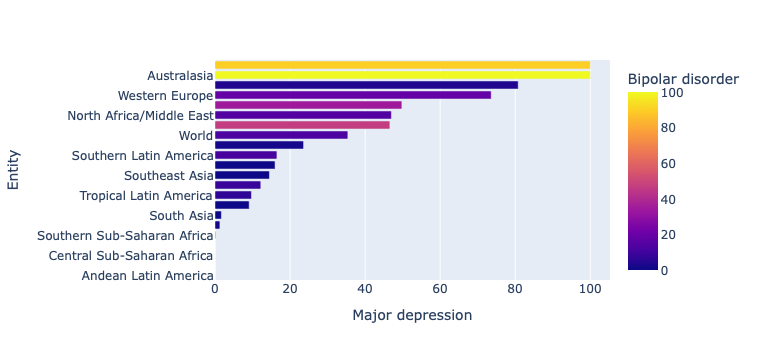

<Figure size 1280x960 with 0 Axes>

In [157]:
df2.sort_values(by= "Major depression" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Major depression", y="Entity", orientation='h',color='Bipolar disorder')
fig.show()

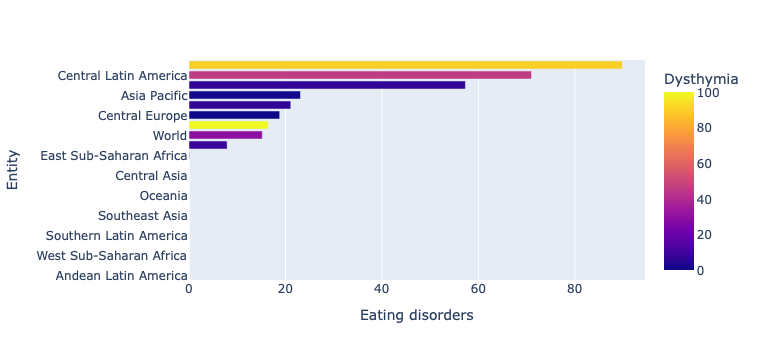

<Figure size 1280x960 with 0 Axes>

In [159]:
df2.sort_values(by= "Eating disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Eating disorders", y="Entity", orientation='h',color='Dysthymia')
fig.show()

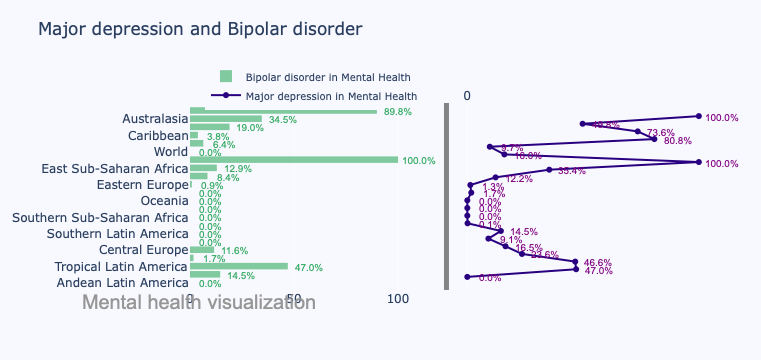

In [160]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

x1 = ["Andean Latin America", "West Sub-Saharan Africa", "Tropical Latin America", "Central Asia", "Central Europe",
    "Central Sub-Saharan Africa", "Southern Latin America", "North Africa/Middle East", "Southern Sub-Saharan Africa",
    "Southeast Asia", "Oceania", "Central Latin America", "Eastern Europe", "South Asia", "East Sub-Saharan Africa",
    "Western Europe", "World", "East Asia", "Caribbean", "Asia Pacific", "Australasia", "North America"]

fig.append_trace(go.Bar(
    x=df2["Bipolar disorder"],
    y=x1,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(20, 10, 56, 1.0)',
            width=0),
    ),
    name='Bipolar disorder in Mental Health',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=df2["Major depression"], y=x1,
    mode='lines+markers',
    line_color='rgb(40, 0, 128)',
    name='Major depression in Mental Health',
), 1, 2)

fig.update_layout(
    title='Major depression and Bipolar disorder',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=5,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.45],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=10000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []


# Adding labels
for ydn, yd, xd in zip(df2["Major depression"], df2["Bipolar disorder"], x1):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+10,
                            text='{:,}'.format(ydn) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd+10 ,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text="Mental health visualization",
                        font=dict(family='Arial', size=20, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

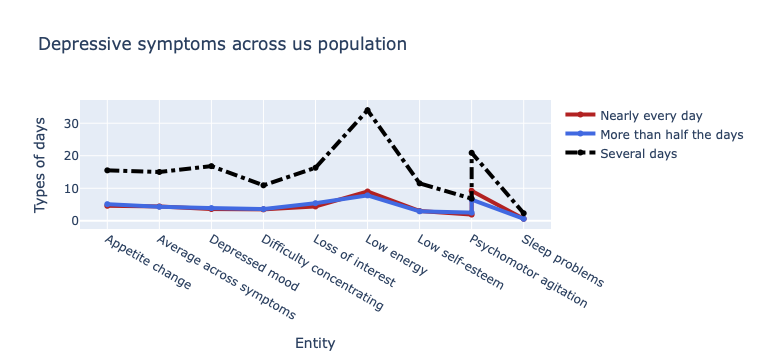

In [162]:
x = ["Appetite change", "Average across symptoms", "Depressed mood", "Difficulty concentrating", "Loss of interest",
    "Low energy", "Low self-esteem", "Psychomotor agitation", "Psychomotor agitation", "Sleep problems", "Suicidal ideation"]

fig = go.Figure()

# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df3["Nearly every day"], name='Nearly every day',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["More than half the days"], name = 'More than half the days',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["Several days"], name='Several days',
                         line=dict(color='black', width=4,
                              dash='dashdot') 
))

# Edit the layout
fig.update_layout(title='Depressive symptoms across us population',
                   xaxis_title='Entity',
                   yaxis_title='Types of days')

fig.show()

# Listing the column names

In [166]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [168]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders', 
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

In [170]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

# This is correlation example of the data used for this project

<Axes: >

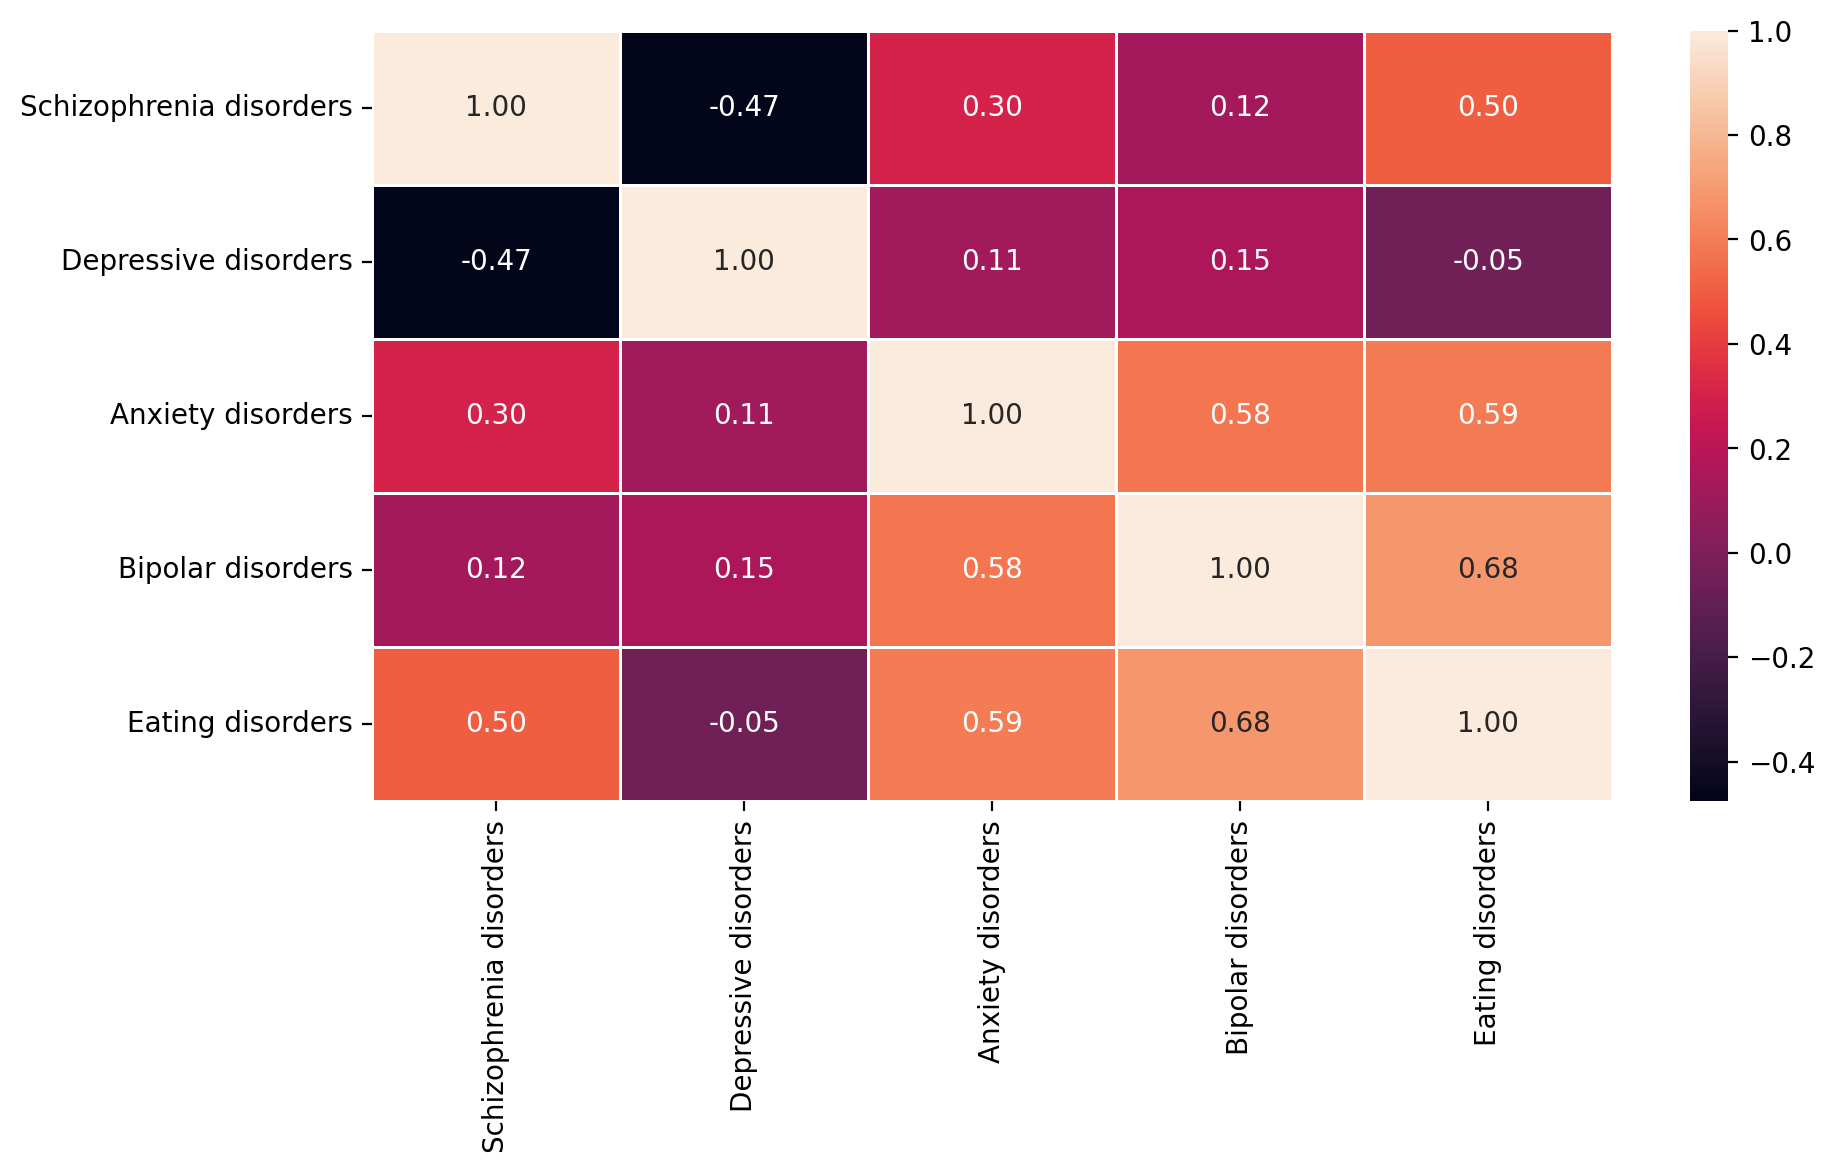

In [173]:
Corrmat = df1_variables.corr()
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

# Few Scatter Plotts for the disorders

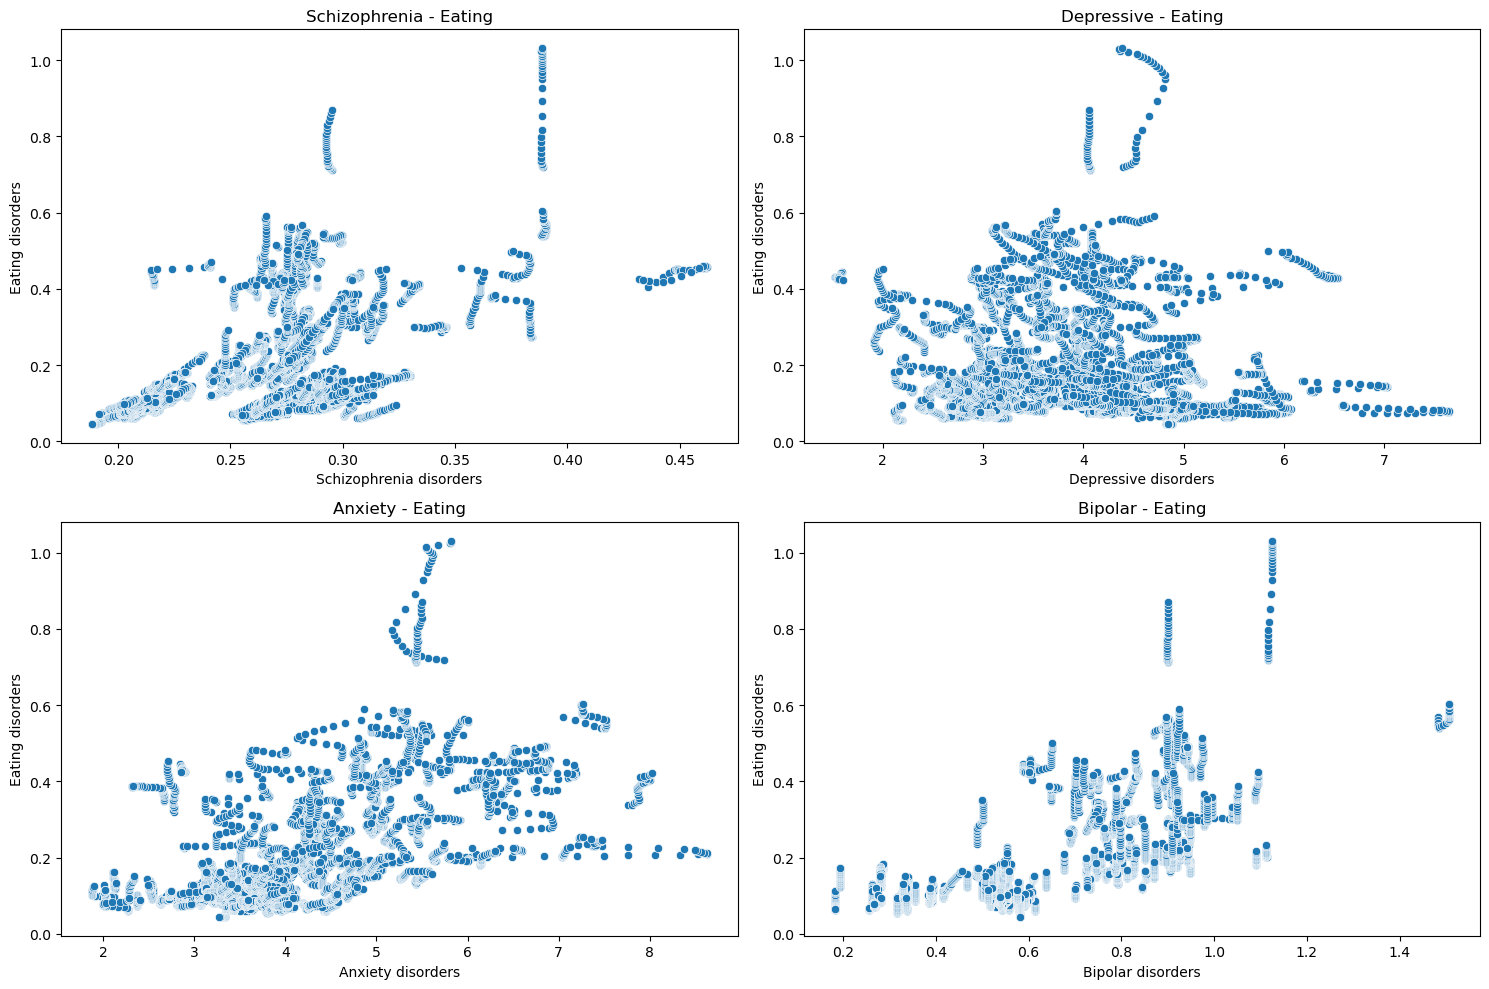

In [176]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize= (15,10))

ax1.set_title('Schizophrenia - Eating')
sns.scatterplot(x="Schizophrenia disorders", y="Eating disorders", data=df1_variables, ax=ax1)

ax2.set_title('Depressive - Eating')
sns.scatterplot(x='Depressive disorders', y="Eating disorders", data=df1_variables, ax=ax2)

ax3.set_title('Anxiety - Eating')
sns.scatterplot(x='Anxiety disorders', y="Eating disorders", data=df1_variables, ax=ax3)

ax4.set_title('Bipolar - Eating')
sns.scatterplot(x='Bipolar disorders', y="Eating disorders", data=df1_variables, ax=ax4)

plt.tight_layout()

In [177]:
features = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders']
X_model = df1[features]
y_model = df1["Eating disorders"]

In [180]:
scaler = preprocessing.MinMaxScaler()
X_model_norm = scaler.fit_transform(X_model)

In [182]:
X_model_norm

array([[0.12714204, 0.56728135, 0.42008448, 0.39345779],
       [0.12439376, 0.56616628, 0.41842183, 0.39273757],
       [0.1218262 , 0.56486898, 0.41570011, 0.39177399],
       ...,
       [0.04832425, 0.30858363, 0.19399437, 0.26936249],
       [0.0495569 , 0.30776117, 0.19157658, 0.26935944],
       [0.05140367, 0.30589079, 0.1863733 , 0.26935592]])

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X_model_norm, y_model, test_size=20, random_state=42)

In [186]:
print("Shape of x_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (6400, 4)
Shape of y_train :  (6400,)
Shape of x_test :  (20, 4)
Shape of y_test :  (20,)


In [188]:
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression()

In [190]:
y_pred = Model.predict(X_test)

In [192]:
print("Mean Absolute Error of Model is: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error of Model is: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared of Model is: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error of Model is:  0.08003250281357936
Mean Squared Error of Model is:  0.02178632883846133
Root Mean Squared of Model is:  0.14760192694697902


In [194]:
k_fold = KFold(10)
print (cross_val_score(Model, X_model_norm, y_model.ravel(), cv=k_fold, n_jobs=1))

[0.67019159 0.30224538 0.34774549 0.6311535  0.62898747 0.59061848
 0.66269011 0.57389516 0.64517085 0.84017723]


# CDF for variables defined in this project

In [197]:
def ecdf(data):

    x= np.sort(data)
    n = x.size
    y = np.arange(1,n+1)/n

    return(x,y)

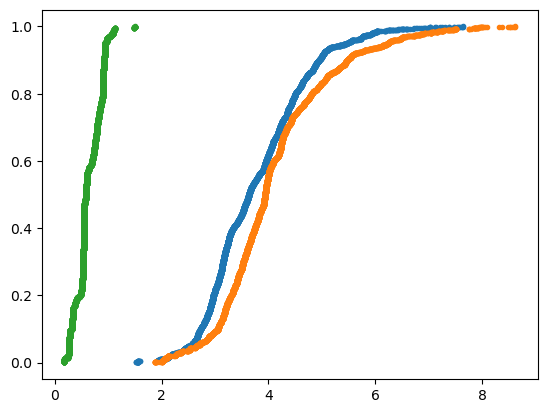

In [199]:
depressive = df1_variables["Depressive disorders"]

Anxiety = df1_variables["Anxiety disorders"]

Bipolar = df1_variables["Bipolar disorders"]

#cumulative = np.linspace(0,1,len(depressive))

#sorted_data = np.sort(depressive)

#cumulative_data = np.cumsum(sorted_data)/np.sum(sorted_data)

x_dep,y_dep = ecdf(depressive)

x_anx,y_anx = ecdf(Anxiety)

x_bipolar,y_bipolar = ecdf(Bipolar)


#plt.plot(sorted_data,cumulative_data)

plt.plot(x_dep,y_dep,marker = '.',linestyle='none')
plt.plot(x_anx,y_anx,marker = '.',linestyle='none')
plt.plot(x_bipolar,y_bipolar,marker = '.',linestyle='none')

#plt.xlabel("depressive")
#plt.ylabel("Cumulative Proportion")
#plt.title("CDF of depression")

plt.show()

## Spread Percentage for Anxiety Disorder

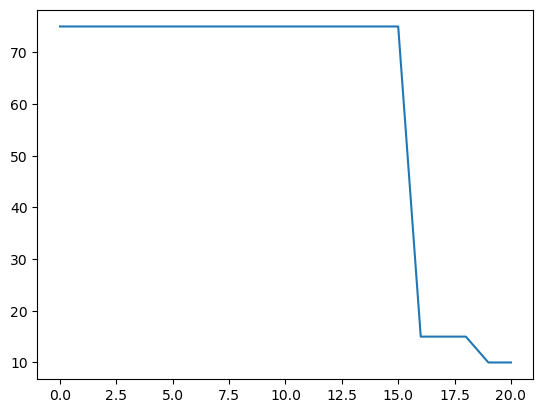

In [202]:
target = [75,15,10]

group = pd.cut(df1_variables["Anxiety disorders"].cumsum(), bins= np.r_[0,np.cumsum(target)],labels=target)

df1_variables.index.groupby(group)

plt.plot(group)

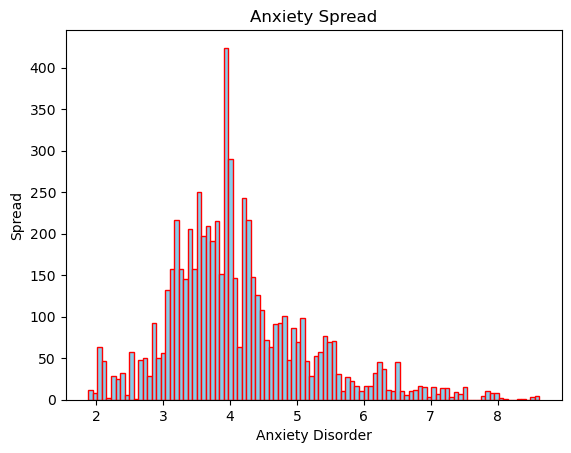

In [204]:
# Plotting a basic histogram
plt.hist(df1_variables["Anxiety disorders"], bins=100, color='skyblue', edgecolor='red')
 
# Adding labels and title
plt.xlabel('Anxiety Disorder')
plt.ylabel('Spread')
plt.title('Anxiety Spread')
 
# Display the plot
plt.show()

## PMF for dataset used in this term project

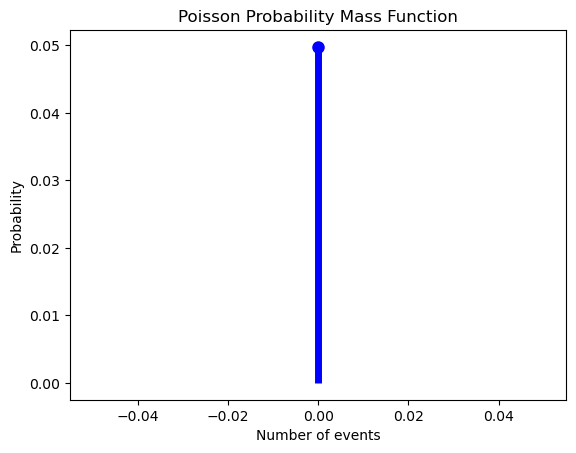

In [218]:
lam = 3

# Create an array of x values
x = np.arange(0,df1_variables["Bipolar disorders"].mean()).tolist()

# Create the Poisson probability mass function
pmf = poisson.pmf(x, lam)

# Create the plot
plt.plot(x, pmf, 'bo', ms=8)
plt.vlines(x, 0, pmf, colors='b', lw=5)
plt.title('Poisson Probability Mass Function')
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.show()